In [2]:
import cv2
import numpy as np
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# Path to dataset: structured as "dataset/A/A1.jpg", "dataset/B/B2.jpg", etc.
DATASET_PATH = "C:/Users/johnsoml/Python/asl_dataset"  #Replace with your dataset path
IMAGE_SIZE = (100, 100)

def load_images_and_labels(dataset_path):
    X = []
    y = []
    for label in sorted(os.listdir(dataset_path)):
        label_path = os.path.join(dataset_path, label)
        if not os.path.isdir(label_path):
            continue
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, IMAGE_SIZE)
            edges = cv2.Canny(img, 100, 200)
            X.append(edges.flatten())
            y.append(label)
    return np.array(X), np.array(y)

# Load data
print("Loading images...")
X, y = load_images_and_labels(DATASET_PATH)

Loading images...


In [14]:
def letters_to_numbers(char_list):
    """
    Convert list of letters a-z (or A-Z) to numbers 1-26.

    Args:
        char_list (list of str): List of single-character strings (a-z or A-Z).

    Returns:
        list of int: Corresponding numbers from 1 to 26.
    """
    return [ord(char.lower()) - ord('a') + 1 for char in char_list]

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Combine two colormaps to get at least 26 distinct colors
base_colors = plt.get_cmap('tab20').colors + plt.get_cmap('Set3').colors
distinct_colors = base_colors[:26]  # Take first 26

custom_cmap = ListedColormap(distinct_colors)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


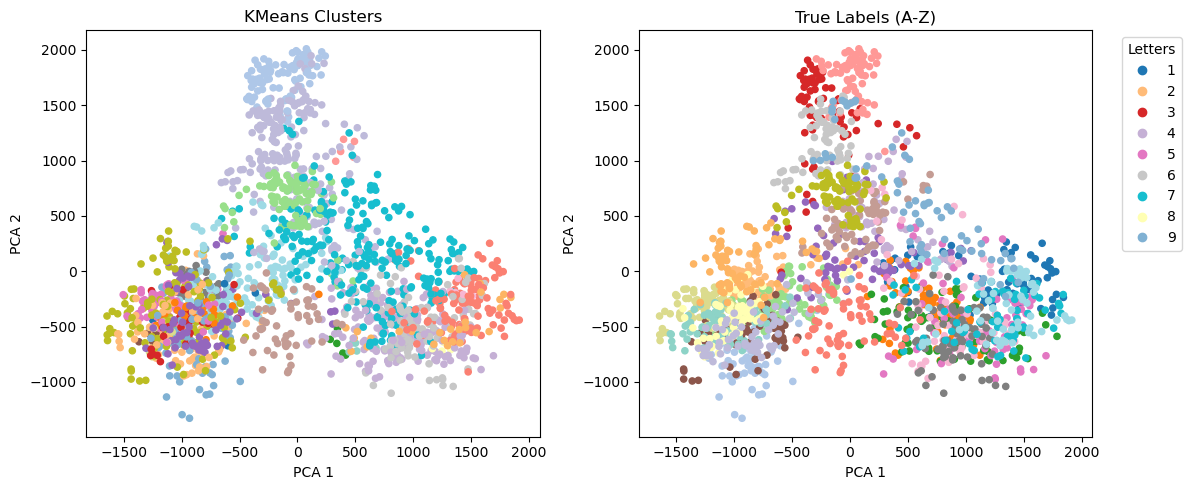

In [18]:
# Fake letter labels for demonstration ('A' to 'J')
y_letters = letters_to_numbers(y)

# Convert letters to numeric values for plotting
label_to_index = {label: idx for idx, label in enumerate(sorted(set(y_letters)))}
y_numeric = np.array([label_to_index[label] for label in y_letters])

# KMeans clustering
kmeans = KMeans(n_clusters=26, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Dimensionality reduction for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot KMeans clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap=custom_cmap, s=20)
plt.title("KMeans Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Plot True Labels (letters A–Z)
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap=custom_cmap, s=20)
plt.title("True Labels (A-Z)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()

In [21]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming letters_to_numbers is defined and y is your original list of letters (a-z lowercase or uppercase)
# y_letters = letters_to_numbers(y)  # Convert letters to numbers 1-26

# For counting, convert back to letters for clarity
# If y_letters are numbers 1-26, convert back to letters:
letters = [chr(n + 64) for n in y_letters]  # 1->A, 2->B, ..., 26->Z

# Convert letters to numeric values for plotting
label_to_index = {label: idx for idx, label in enumerate(sorted(set(y_letters)))}
y_numeric = np.array([label_to_index[label] for label in y_letters])

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Dimensionality reduction for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Count letters per cluster
df = pd.DataFrame({'cluster': cluster_labels, 'letter': letters})
count_table = pd.crosstab(df['cluster'], df['letter'])

import plotly.graph_objects as go

# Create scrollable Plotly table
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["Cluster"] + list(count_table.columns),
        fill_color='lightblue',
        align='left'
    ),
    cells=dict(
        values=[count_table.index] + [count_table[col].tolist() for col in count_table.columns],
        fill_color='white',
        align='left',
        height=25
    )
)])

fig.update_layout(
    title="Letter Counts per KMeans Cluster",
    height=600,
    width=1000
)

fig.show()


C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


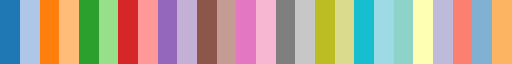

In [17]:
custom_cmap

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

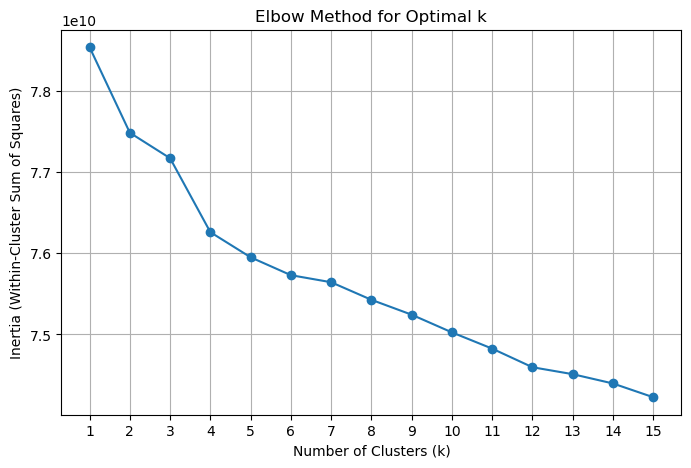

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def elbow_method_kmeans(X, max_k=15):
    """
    Runs the Elbow Method to determine optimal K for KMeans.
    
    Args:
        X (array-like): Input feature data.
        max_k (int): Maximum number of clusters to test.

    Returns:
        None. Displays plot of inertia vs number of clusters.
    """
    inertias = []

    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # Plot the elbow
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
    plt.xticks(range(1, max_k + 1))
    plt.grid(True)
    plt.show()
    


elbow_method_kmeans(X, max_k=15)

In [26]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Train SVM classifier with timing
print("Training classifier...")
start_train = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
end_train = time.time()
print(f"Training completed in {end_train - start_train:.4f} seconds.")

# Evaluate with timing
print("Evaluating...")
start_eval = time.time()
y_pred = knn.predict(X_test)
end_eval = time.time()
print(f"Evaluation completed in {end_eval - start_eval:.4f} seconds.")
print(classification_report(y_test, y_pred))

Training classifier...
Training completed in 0.0023 seconds.
Evaluating...
Evaluation completed in 0.1337 seconds.
              precision    recall  f1-score   support

           a       0.82      0.75      0.78        12
           b       0.61      0.85      0.71        13
           c       0.68      0.93      0.79        14
           d       0.86      0.55      0.67        11
           e       1.00      0.55      0.71        11
           f       0.94      0.80      0.86        20
           g       1.00      0.83      0.91        12
           h       1.00      0.77      0.87        13
           i       1.00      0.40      0.57        15
           j       1.00      0.44      0.61        16
           k       0.78      0.95      0.86        19
           l       0.80      0.67      0.73         6
           m       1.00      0.73      0.85        15
           n       1.00      0.50      0.67        14
           o       0.67      0.83      0.74        12
           p       0

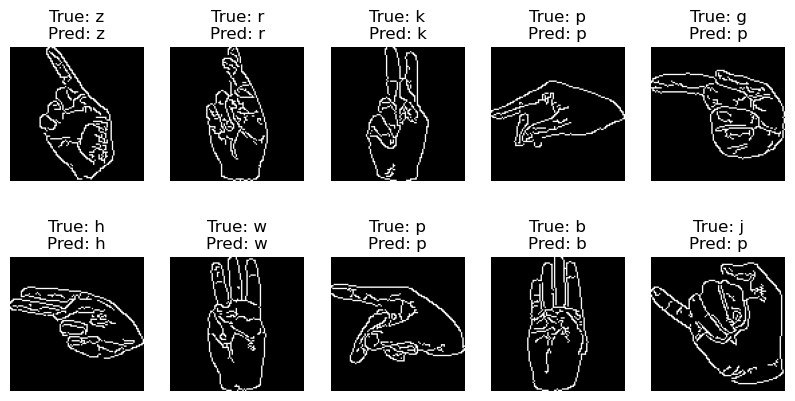

In [7]:
# Show some examples
def show_examples(images, labels, preds=None):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        edge_img = images[i].reshape(IMAGE_SIZE)
        plt.imshow(edge_img, cmap='gray')
        title = f"True: {labels[i]}"
        if preds is not None:
            title += f"\nPred: {preds[i]}"
        plt.title(title)
        plt.axis('off')
    #plt.tight_layout()
    plt.ion()
    plt.show()

show_examples(X_test, y_test, y_pred)

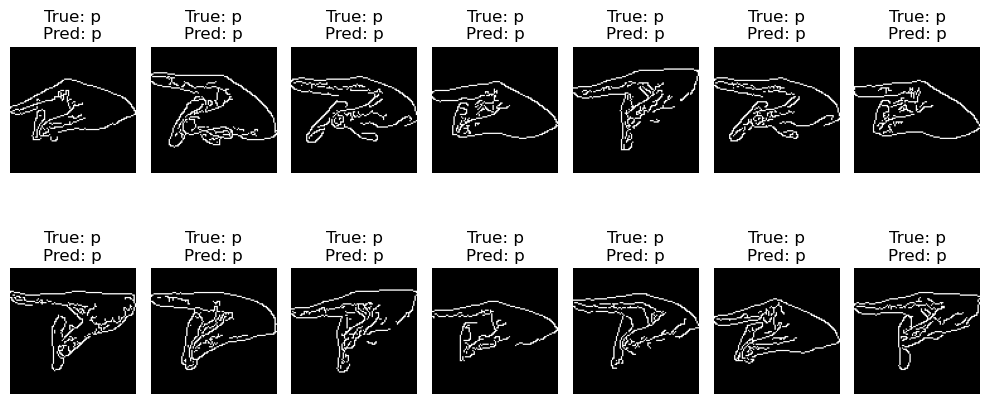

In [27]:
# Pick out indices where y_test is 'P'
indices = [i for i, label in enumerate(y_test) if (label == 'p')]

# Extract images and predictions for these indices
asl_images_p = X_test[indices]
true_labels_p = [y_test[i] for i in indices]
pred_labels_p = [y_pred[i] for i in indices]


show_examples(asl_images_p, true_labels_p, pred_labels_p)

In [20]:
for i in range(len(y_test)-1):
    if y_test[i] != y_pred[i]:
        print(y_test[i],y_pred[i])

g p
j p
e d
y p
n c
s k
v p
s p
f b
y p
l p
y p
m k
l p
e d
u v
c o
i p
j p
x o
u k
i p
g c
r p
d p
c o
s p
a o
w k
e c
b u
v k
x p
c o
i p
r z
v k
n p
l p
e o
y p
i p
e o
e p
y p
t a
z p
o c
h p
q p
t p
s o
z p
h g
c p
i p
s o
n a
j p
t p
v k
m p
r p
w r
v k
i p
a o
w k
e p
e o
s p
x o
e p
l p
w k
q p
t l
s p
g p
y p
q p
d p
t p


In [39]:
import matplotlib.pyplot as plt
import os

def show_and_save_examples(images, labels, preds=None, save_dir="asl_predictions", image_size=(28, 28)):
    # Create directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    for i in range(len(images)):
        plt.figure(figsize=(2, 2))
        edge_img = images[i].reshape(image_size)
        plt.imshow(edge_img, cmap='gray')

        title = f"True: {labels[i]}"
        if preds is not None:
            title += f" | Pred: {preds[i]}"
        plt.title(title)
        plt.axis('off')

        # Save each image
        filename = f"{save_dir}/example_{i}.png"
        plt.savefig(filename, bbox_inches='tight')
        plt.close()  # Close the figure to avoid memory issues

    print(f"Saved {len(images)} examples to '{save_dir}'")

# Example usage
show_and_save_examples(X_test, y_test, y_pred, image_size=IMAGE_SIZE)


Saved 363 examples to 'asl_predictions'
